# 详细说明 sns.JointGrid()

`sns.JointGrid()` 是 Seaborn 库中用于创建联合分布图的高级接口，它允许你在一个图形中同时展示两个变量的散点图（或其他双变量关系图）以及各自的单变量分布图（通常是直方图或核密度估计图）。

## 基本概念

JointGrid 创建了一个包含三个子图的网格布局：
1. 中心区域：双变量关系图（如散点图）
2. 上方区域：x 变量的单变量分布
3. 右侧区域：y 变量的单变量分布

## 基本用法

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 创建JointGrid对象
g = sns.JointGrid(data=df, x="x_var", y="y_var")

# 绘制图形
g.plot_joint(sns.scatterplot)  # 中心区域绘制散点图
g.plot_marginals(sns.histplot) # 边缘区域绘制直方图

plt.show()
```

## 主要参数

- `data`: 数据框（DataFrame）
- `x`, `y`: 指定数据框中用作x和y轴的列名
- `height`: 主图的高度（英寸）
- `ratio`: 边缘图与主图的大小比例（默认为5）
- `space`: 边缘图与主图之间的间距（默认为0.2）
- `xlim`, `ylim`: 设置x轴和y轴的显示范围
- `dropna`: 是否删除缺失值（默认为False）

## 高级用法

### 1. 自定义绘图函数

```python
g = sns.JointGrid(data=df, x="x_var", y="y_var")
g.plot_joint(sns.kdeplot, cmap="Blues", levels=5)  # 使用核密度估计图
g.plot_marginals(sns.boxplot)  # 使用箱线图作为边缘图
```

### 2. 添加回归线

```python
g = sns.JointGrid(data=df, x="x_var", y="y_var")
g.plot_joint(sns.regplot, scatter_kws={"s": 10})  # 带回归线的散点图
g.plot_marginals(sns.histplot)
```

### 3. 添加统计信息

```python
from scipy import stats

g = sns.JointGrid(data=df, x="x_var", y="y_var")
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)

# 计算并显示相关系数和p值
r, p = stats.pearsonr(df["x_var"], df["y_var"])
g.ax_joint.annotate(f"r = {r:.2f}, p = {p:.3f}",
                    xy=(0.1, 0.9), xycoords="axes fraction")
```

### 4. 多类型组合

```python
g = sns.JointGrid(data=df, x="x_var", y="y_var")
g.plot_joint(sns.scatterplot, color="g", s=50, alpha=0.6)
g.plot_marginals(sns.kdeplot, color="g", fill=True)
```

## 与 jointplot() 的区别

1. `jointplot()` 是一个更高级的函数，它自动完成绘图，适合快速可视化
2. `JointGrid()` 提供了更大的灵活性，允许你完全控制每个子图的绘制方式
3. 如果你需要自定义绘图元素或添加复杂注释，应该使用 `JointGrid()`

## 实际示例

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
tips = sns.load_dataset("tips")

# 创建JointGrid
g = sns.JointGrid(data=tips, x="total_bill", y="tip", height=8)

# 自定义绘图
g.plot_joint(sns.scatterplot, hue=tips["time"], 
             palette={"Lunch": "orange", "Dinner": "blue"}, s=80)
g.plot_marginals(sns.kdeplot, color="grey", fill=True)

# 添加标题和调整布局
g.fig.suptitle("Total Bill vs Tip by Meal Time", y=1.02)
plt.tight_layout()
plt.show()
```

## 总结

`sns.JointGrid()` 是 Seaborn 中用于创建高度可定制联合分布图的强大工具。它提供了对图形各个组件的完全控制，适合需要精细调整可视化效果的场景。通过组合不同的绘图函数和自定义参数，你可以创建出专业级别的统计图形。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

这段代码使用了 Seaborn 的 JointGrid 来创建一个企鹅数据集的双变量分布可视化，结合了核密度估计图(KDE)和直方图。

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
208,Chinstrap,Dream,45.2,16.6,191.0,3250.0,FEMALE
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,MALE
211,Chinstrap,Dream,45.6,19.4,194.0,3525.0,FEMALE
180,Chinstrap,Dream,46.4,17.8,191.0,3700.0,FEMALE
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,MALE
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,FEMALE
41,Adelie,Dream,40.8,18.4,195.0,3900.0,MALE
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,MALE
275,Gentoo,Biscoe,45.0,15.4,220.0,5050.0,MALE
172,Chinstrap,Dream,42.4,17.3,181.0,3600.0,FEMALE


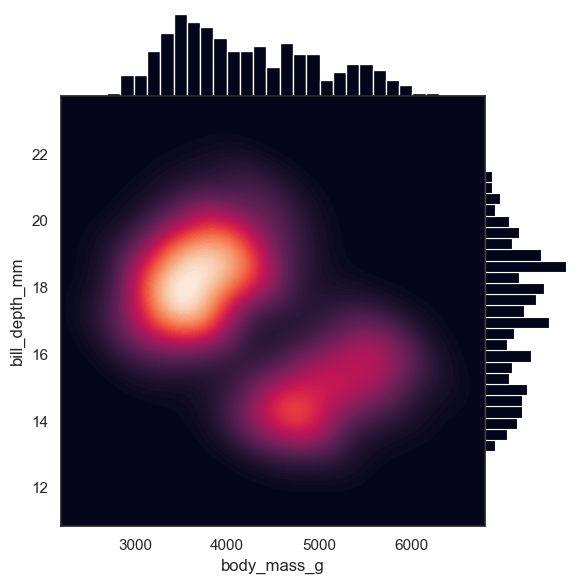

In [20]:
sns.set_theme(style="white")
penguins = pd.read_csv("seaborn-data/penguins.csv")
display(penguins.sample(10))

g = sns.JointGrid(
        data=penguins,
        x="body_mass_g",
        y="bill_depth_mm",
        space=0  # space=0: 设置主图与边缘图之间的间距为0，使它们紧密相连
    )

# 绘制中心区域 - 核密度估计图(KDE)
g.plot_joint(
        sns.kdeplot,    # 使用核密度估计方法绘制双变量分布
        fill=True,      # 填充等高线之间的区域
        clip=((2200, 6800), (10, 25)),  # 限制绘图范围，x轴范围: 2200-6800克(体质量)，y轴范围: 10-25毫米(喙深度)
        thresh=0,       # 密度阈值，0表示显示所有密度水平
        levels=100,     # 使用100个等高线级别，使过渡更平滑
        cmap="rocket"   # 使用"rocket"颜色映射(从深色到亮色的渐变)
    )

# 绘制边缘区域 - 直方图
g.plot_marginals(
        sns.histplot,   # 绘制直方图显示单变量分布
        color="#03051A",# 使用深蓝色(#03051A)作为直方图颜色
        alpha=1,        # 完全不透明
        bins=25         # 使用25个柱状条
    )

这段代码展示了如何使用 Seaborn 的 JointGrid 创建汽车数据集(mpg)的燃油效率(mpg)与加速度(acceleration)关系的自定义可视化，结合了散点图和rugplot。

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
315,24.3,4,151.0,90.0,3003,20.1,80,usa,amc concord
79,26.0,4,96.0,69.0,2189,18.0,72,europe,renault 12 (sw)
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick
314,26.4,4,140.0,88.0,2870,18.1,80,usa,ford fairmont
23,26.0,4,121.0,113.0,2234,12.5,70,europe,bmw 2002
29,27.0,4,97.0,88.0,2130,14.5,71,japan,datsun pl510
276,21.6,4,121.0,115.0,2795,15.7,78,europe,saab 99gle
362,24.2,6,146.0,120.0,2930,13.8,81,japan,datsun 810 maxima
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d


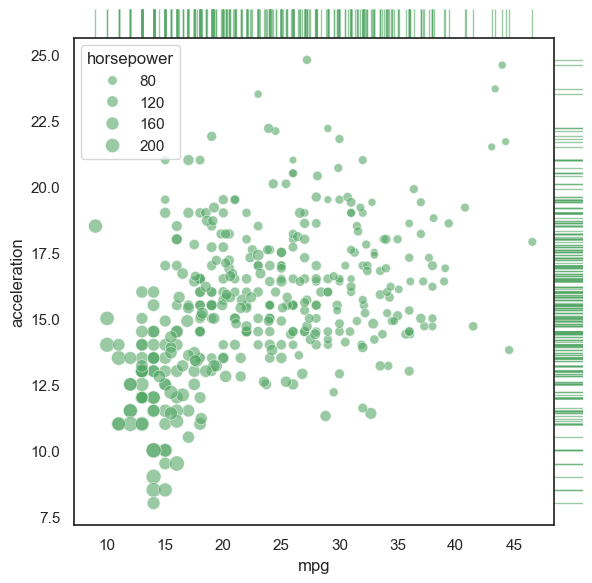

In [ ]:
sns.set_theme(
    style="white",      # 使用白色背景的主题，简洁无网格线
    color_codes=True    # 允许使用简单的颜色代码(如"g"表示绿色)来指定颜色
    )
mpg = pd.read_csv("seaborn-data/mpg.csv")
display(mpg.sample(10))

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=mpg, x="mpg", y="acceleration", space=0, ratio=17)
# 绘制中心区域 - 散点图
g.plot_joint(sns.scatterplot, size=mpg["horsepower"], sizes=(30, 120),
             color="g", alpha=.6,
    legend=False    # 不显示图例(特别是因为设置了size)
    )
# 绘制边缘区域 - Rugplot
g.plot_marginals(
    sns.rugplot,    # 制rugplot(在坐标轴上的小刻度线表示数据分布)
    height=1,
    color="g",
    alpha=.6
    )

这段代码使用 Seaborn 的 JointGrid 创建了一个关于系外行星发现年份与距离的联合分布图，结合了双变量直方图和边缘直方图，并包含了一些高级定制功能。

,method,number,orbital_period,mass,distance,year
567,Radial Velocity,1,351.500000,2.500,67.39,2007
319,Radial Velocity,2,25.648000,0.027,52.03,2013
461,Radial Velocity,1,883.000000,2.200,121.36,2011
39,Eclipse Timing Variations,2,5573.550000,NaN,500.00,2010
240,Radial Velocity,1,711.000000,6.540,66.49,2005
180,Transit,2,5.005425,NaN,354.00,2011
388,Radial Velocity,1,325.810000,3.860,32.32,2000
424,Radial Velocity,1,48.056000,0.210,51.26,2005
792,Orbital Brightness Modulation,1,1.544929,NaN,NaN,2013
559,Radial Velocity,1,1136.100000,5.930,62.11,2002


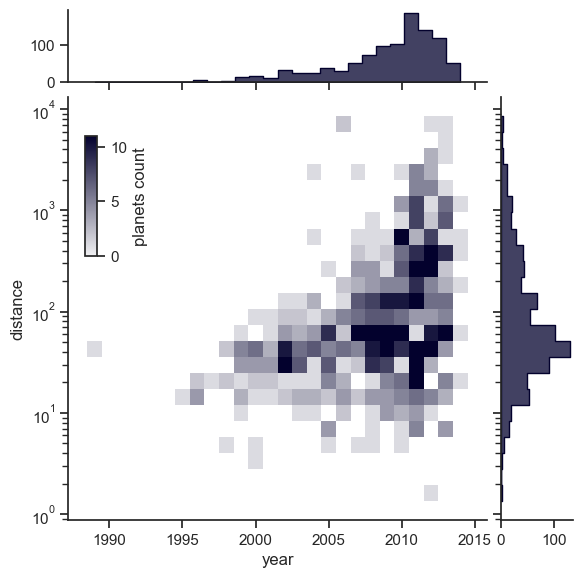

In [40]:
sns.set_theme(style="ticks")
planets = pd.read_csv("seaborn-data/planets.csv")
display(planets.sample(10))

g = sns.JointGrid(data=planets, x="year", y="distance",
    marginal_ticks=True # 在边缘图上显示刻度线
    )

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")    # 将主图的y轴设置为对数刻度，适合展示跨度大的距离数据

# Create an inset legend for the histogram colorbar
# 在主图中添加一个新的坐标轴用于颜色条
# 参数 [.15, .55, .02, .2] 表示:
#     左边界位置: 15% 图形宽度处
#     底部位置: 55% 图形高度处
#     宽度: 2% 图形宽度
#     高度: 20% 图形高度
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
# 绘制主图 - 双变量直方图
g.plot_joint(
    sns.histplot,           # 制双变量直方图(2D直方图)
    discrete=(True, False), # x轴(年份)作为离散变量处理，y轴(距离)作为连续变量处理
    cmap="light:#03012d",   # 使用从浅色到深蓝色(#03012d)的自定义颜色映射
    pmax=0.8,               # 将颜色映射的最大值设为80%的箱子高度，增强对比度
    cbar=True,              # 显示颜色条
    cbar_ax=cax,            # 使用之前创建的坐标轴位置放置颜色条
    cbar_kws={"label": "planets count"}
    )

# 绘制边缘图 - 单变量直方图
g.plot_marginals(
    sns.histplot,
    element="step",     # 使用阶梯样式绘制直方图，形成更清晰的轮廓
    color="#03012d"     # 使用深蓝色，与主图颜色一致
    )

## 可视化效果说明

1. **主图**:
   - 2D直方图展示不同年份发现的行星数量与距离的关系
   - y轴使用对数刻度，便于观察不同数量级的距离分布
   - 颜色表示行星数量，从浅色(少)到深蓝色(多)

2. **上方边缘图**:
   - 每年发现的行星数量(阶梯式直方图)

3. **右侧边缘图**:
   - 行星距离的分布(对数刻度，阶梯式直方图)

4. **颜色条**:
   - 位于主图左上角，解释颜色与行星数量的对应关系

## 技术细节解析

- **对数刻度**: 处理距离这种跨度大的数据时，对数刻度能更好地展示分布
- **离散年份**: 将年份作为离散变量处理，每个年份一个柱子
- **pmax参数**: 限制颜色映射范围，避免少数极高值导致大部分区域颜色对比不足
- **阶梯直方图**: 比传统条形直方图更简洁，适合展示分布轮廓
- **自定义颜色条位置**: 避免遮挡主图数据，同时保持可读性

## 可视化优势

1. 清晰地展示了行星发现随时间和距离的分布模式
2. 对数刻度有效处理了距离数据的巨大范围
3. 颜色映射和阶梯直方图提供了清晰的视觉层次
4. 自定义颜色条位置优化了图表布局